In [1]:
import pandas as pd
housing=pd.read_csv(r"I:\ML Project\HousePrediction.csv")


In [2]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
CRIM       504 non-null float64
ZN         504 non-null float64
INDUS      504 non-null float64
CHAS       504 non-null int64
NOX        504 non-null float64
RM         499 non-null float64
AGE        504 non-null float64
DIS        504 non-null float64
RAD        504 non-null int64
TAX        504 non-null int64
PTRATIO    504 non-null float64
B          504 non-null float64
LSTAT      504 non-null float64
MEDV       504 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.2 KB


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,504.000000,504.000000,504.000000,504.000000,504.000000,499.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,3.627362,11.235119,11.159504,0.069444,0.555007,6.281148,68.616667,3.786793,9.571429,408.740079,18.462302,356.525615,12.654127,22.531349
std,8.615810,23.195465,6.862696,0.254461,0.115962,0.704704,28.104125,2.105589,8.717277,168.671637,2.164361,91.445606,7.137129,9.201867
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.884500,45.075000,2.097050,4.000000,279.000000,17.400000,375.300000,6.990000,17.075000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.190950,5.000000,330.000000,19.100000,391.385000,11.360000,21.200000
75%,3.681942,12.500000,18.100000,0.000000,0.624000,6.618500,94.025000,5.118000,24.000000,666.000000,20.200000,396.232500,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing['CHAS'].value_counts()

0    469
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199258B71D0>,
      dtype=object)

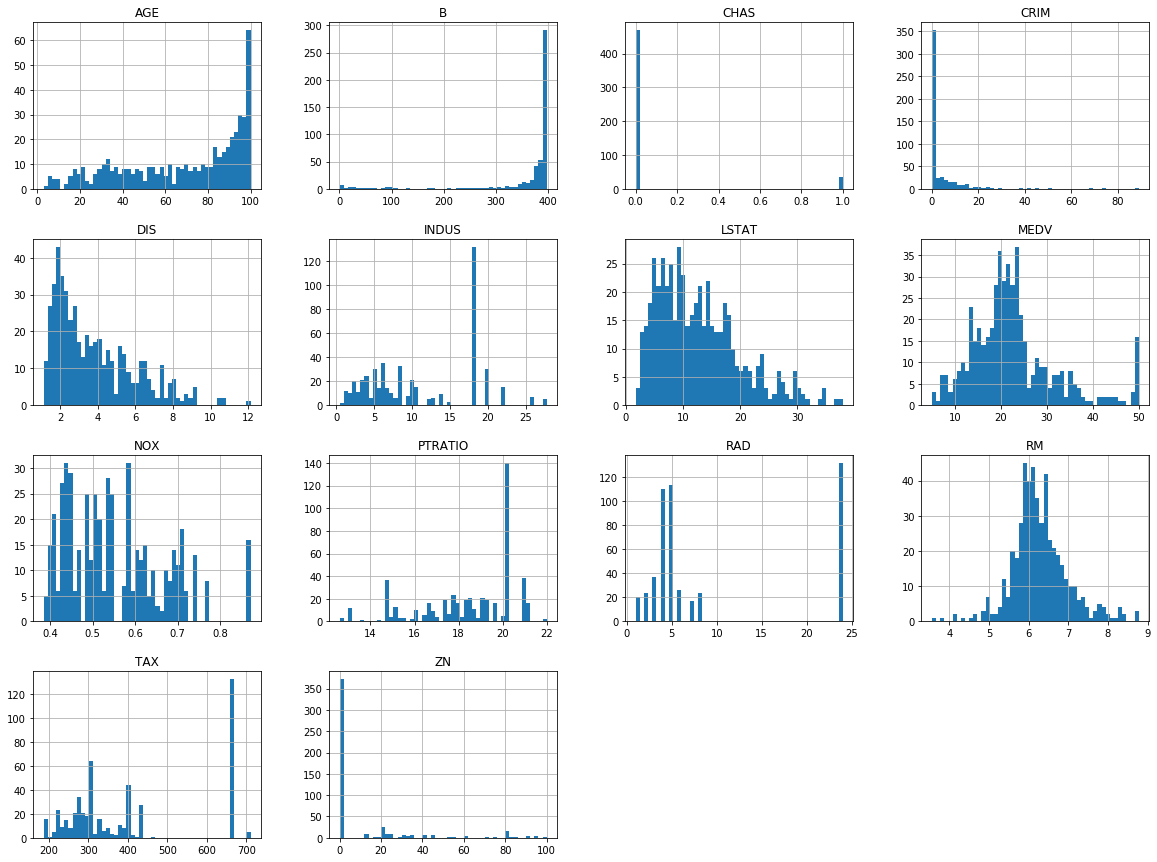

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [8]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [9]:
#train_set,test_set=split_train_test(housing,0.2)
#print(f"Rows in training set:{len(train_set)}\n Rows in Test Set:{len(test_set)}")


In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in training set:{len(train_set)}\n Rows in Test Set:{len(test_set)}")

Rows in training set:403
 Rows in Test Set:101


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [12]:
strat_train_set["CHAS"].value_counts()

0    375
1     28
Name: CHAS, dtype: int64

In [13]:
94/7

13.428571428571429

In [14]:
375/28

13.392857142857142

In [15]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694953
ZN         0.358850
B          0.333939
DIS        0.251416
CHAS       0.175587
AGE       -0.374397
RAD       -0.382012
CRIM      -0.388898
NOX       -0.426966
TAX       -0.469064
INDUS     -0.483875
PTRATIO   -0.511998
LSTAT     -0.736757
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001992A867C18>,
      dtype=object)

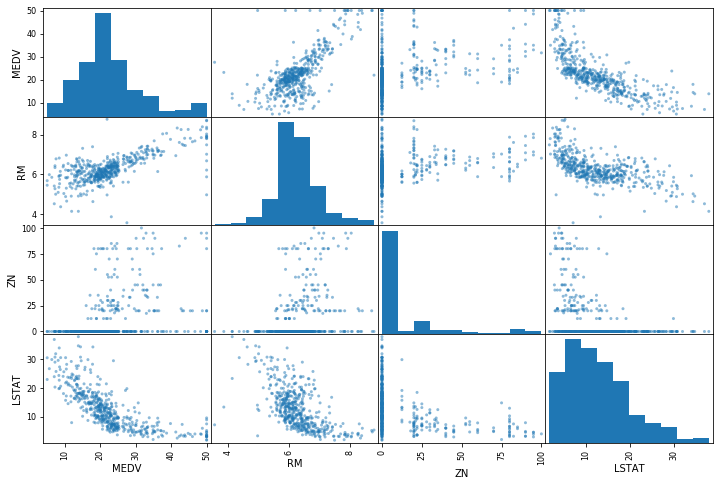

In [16]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

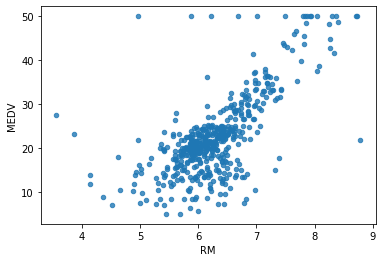

In [17]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [18]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [19]:
a=housing.dropna(subset=["RM"]).shape
a

(399, 13)

In [20]:
housing.drop("RM",axis=1).shape

(403, 12)

In [21]:
median=housing["RM"].median()
housing["RM"].fillna(median)

481    5.762
96     7.820
301    6.982
189    6.739
141    5.468
156    6.066
247    6.176
188    6.951
157    6.510
417    6.824
295    5.790
456    6.301
83     6.630
248    6.487
403    5.683
476    6.185
118    5.870
361    5.803
427    6.380
489    5.983
414    6.782
365    3.863
139    5.019
206    6.064
93     6.625
212    5.412
113    5.928
283    6.453
193    7.875
490    5.983
       ...  
433    6.629
430    6.425
478    6.242
438    5.818
38     7.024
18     5.570
97     7.416
266    7.470
133    6.335
449    6.655
477    6.229
171    6.416
180    7.155
159    7.489
279    6.968
109    6.715
82     6.389
386    4.880
418    6.411
126    6.431
446    6.185
101    6.137
272    6.758
405    5.608
369    6.216
161    8.375
423    5.896
98     6.727
455    5.936
152    6.129
Name: RM, Length: 403, dtype: float64

In [22]:
housing.shape

(403, 13)

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
imputer.statistics_

array([2.8392e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1760e+00, 7.8900e+01, 3.2157e+00, 5.0000e+00, 3.3500e+02,
       1.9100e+01, 3.9095e+02, 1.1740e+01])

In [25]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,3.597720,10.079404,11.345136,0.069479,0.558069,6.261566,69.273449,3.762661,9.704715,410.967742,18.517370,353.113077,12.838437
std,8.149877,21.659794,6.791808,0.254583,0.117938,0.701572,27.901429,2.091242,8.768989,168.652271,2.104956,95.703045,7.158292
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,2.520000,1.730000
25%,0.087665,0.000000,5.255000,0.000000,0.449000,5.878500,46.500000,2.094100,4.000000,284.000000,17.400000,374.695000,7.160000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.176000,78.900000,3.215700,5.000000,335.000000,19.100000,390.950000,11.740000
75%,3.805910,0.000000,18.100000,0.000000,0.631000,6.584500,94.100000,5.116700,24.000000,666.000000,20.200000,395.760000,17.025000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                      ('std_scaler',StandardScaler()),])
housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr

array([[-0.09574485, -0.46592933,  0.99579663, ...,  0.80035944,
         0.41645909, -0.33827105],
       [-0.43193537, -0.46592933, -1.24644952, ..., -0.24609194,
         0.4228409 , -1.29639274],
       [-0.42970803,  1.10575056, -0.77470806, ..., -1.1498454 ,
         0.39040877, -1.11595814],
       ...,
       [-0.42372997, -0.46592933, -0.41058261, ...,  1.13332124,
         0.43570913, -0.47814283],
       [ 0.56547861, -0.46592933,  0.99579663, ...,  0.80035944,
        -3.65764379,  0.57369295],
       [-0.26829663, -0.46592933,  1.21397706, ..., -1.81576901,
        -0.33575702,  0.31912632]])

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
#model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)




array([21.8, 43.8, 33.1, 30.5, 15.6])

In [36]:
list(some_labels)

[21.8, 43.8, 33.1, 30.5, 15.6]

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [45]:
lin_mse

9.395861898414036e-32

In [39]:
lin_rmse

1.6442054806291755

In [40]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-scores)
rmse_scores

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([4.30154658, 4.82115   , 4.61001085])

In [41]:

def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())


In [42]:
print_scores(rmse_scores)

Scores: [4.30154658 4.82115    4.61001085]
Mean: 4.5775691410213435
Standard Deviation: 0.21336397220332934
